In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Aggregate test/aggregate_stats31_8_20.npy",allow_pickle=True)
df=df.item()
df[""]["reward"]["mean"][0][-1]

KeyError: 'sac_model_1500000_pen1000.0_pen_thresh0.0_rep8.zip'

In [3]:
df= np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Time series/time_series_stats29_4_20.npy",allow_pickle=True)
df=df.item()



In [4]:
prices=df["sac_model_1500000_pen1000.0_pen_thresh0.0_rep4.zip"]["price"]

In [5]:
import numpy as np

# Supponiamo che il tuo vettore sia chiamato `data`, con shape (10, 360)
# data = np.array(...)  # Assicurati che i valori siano > 0 per calcolare il log

# Calcolo del logaritmo (naturale)
log_prices = np.log(prices)

# Calcolo della differenza sui 360 step (asse 1)
prices = np.diff(log_prices, axis=1)



In [6]:
prices = np.array(prices**2)

sum_prices = np.sum(prices, axis=1) # For each of n_reps, the sum over max_test_steps (row sum): the result are n_reps single values

var_prices = (sum_prices) / prices.shape[1]   # Sample variance
std_prices = np.sqrt(var_prices)

mean_prices = np.mean(std_prices)             # Final volatility measure
std_std_prices = np.std(std_prices)
                

In [7]:
delta_prices=df["sac_model_1500000_pen1000.0_pen_thresh0.0_rep4.zip"]["Delta Price"]
delta_prices = np.array(delta_prices) 
sum_delta_prices = np.sum(delta_prices, axis=1) # For each of n_reps, the sum over max_test_steps (row sum): the result are n_reps single values
                
var_delta_prices = sum_delta_prices / delta_prices.shape[1]   # Sample variance
std_delta_prices = np.sqrt(var_delta_prices)

mean_std_delta_prices = np.mean(std_delta_prices)             # Final volatility measure
std_std_delta_prices = np.std(std_delta_prices)

In [8]:
mean_prices

np.float32(0.2651074)

In [9]:
mean_std_delta_prices

np.float32(0.2661931)

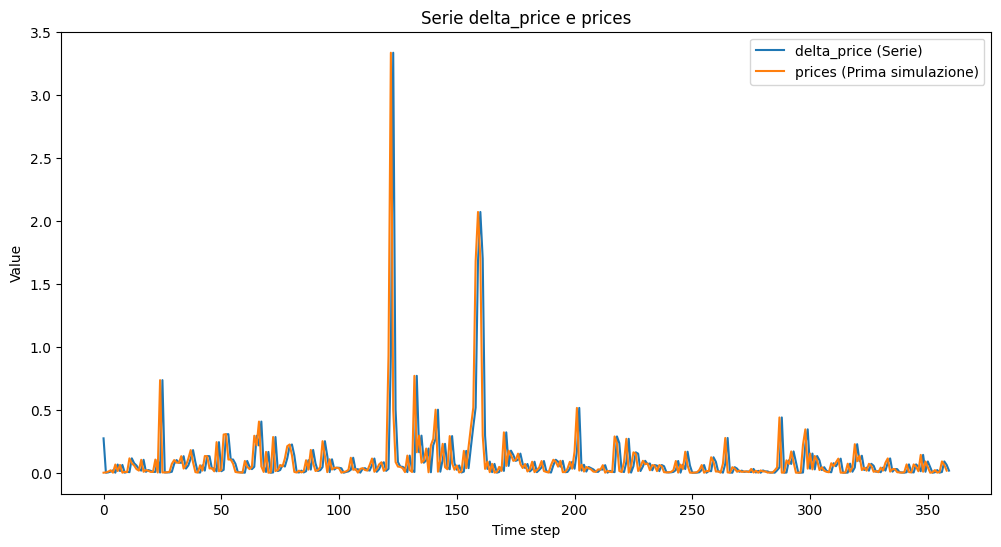

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(delta_prices[0], label='delta_price (Serie)', color='tab:blue')
plt.plot(prices[0], label='prices (Prima simulazione)', color='tab:orange')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Serie delta_price e prices')
plt.legend()
plt.show()

In [12]:
df=np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Aggregate test/aggregate_stats29_4_20.npy",allow_pickle=True)
df=df.item()


In [18]:
price=df["sac_model_1500000_pen1000.0_pen_thresh0.0_rep4.zip"]["price"]["mean"][0]
price = np.log(price)
price = pd.Series(price).diff().dropna()

In [21]:
np.std(price**2)

np.float32(0.021391954)